<a href="https://colab.research.google.com/github/norayehia/graduation-facial-occluded-on-vrap-company/blob/main/noramedit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:




from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Dropout
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
"""
https://colab.research.google.com/drive/1x33KNt_foHfgf9QPbMt1-fmgdjMTajP5?usp=sharing

"""

'\nhttps://colab.research.google.com/drive/1x33KNt_foHfgf9QPbMt1-fmgdjMTajP5?usp=sharing\n\n'

In [ ]:
import cv2
import glob
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.python.keras import regularizers
%matplotlib inline

In [ ]:
tensorflow.keras.regularizers.l1(0.)
tensorflow.keras.regularizers.l2(0.)
tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01)


## Implementing Data Generators

In [ ]:
trainpath = "/content/drive/MyDrive/graduation2/graduation/Final Dataset/trainset_occluded"


In [ ]:
testpath = "/content/drive/MyDrive/graduation2/graduation/Final Dataset/testset_occluded"


In [ ]:
preprocess_input= tf.keras.applications.mobilenet.preprocess_input

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
test_generator = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

Found 3626 images belonging to 7 classes.


In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
generator = datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(trainpath, # same directory as training data
    target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation') # set as validation data

Found 9480 images belonging to 7 classes.
Found 2365 images belonging to 7 classes.


In [ ]:
k.clear_session()

new_input = keras.Input(shape=(224, 224, 3))

#call model add regrization with  dropout
https://www.machinecurve.com/index.php/2020/01/23/how-to-use-l1-l2-and-elastic-net-regularization-with-keras/

In [ ]:
base_model=MobileNet(input_shape=(224, 224, 3), include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu',activity_regularizer=regularizers.l1(0.01))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.25)(x)
preds=Dense(7,activation='softmax',activity_regularizer=regularizers.l1(0.01))(x) #final layer with softmax activation

In [ ]:
model = Model(inputs=base_model.inputs, outputs=preds)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
len(model.layers)

90

In [ ]:
for layer in model.layers:
	layer.trainable = False

In [ ]:
for layer in model.layers[74:]:
	layer.trainable = True

In [ ]:

model.compile(optimizer=Adam(learning_rate=5e-3), loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])


In [ ]:
version = 50
epoch = 20
histories = []

for i in range(5):
  csv_logger = CSVLogger('/content/drive/MyDrive/graduation3/runedit2/history' + str(epoch * (i + 1)) + '.log', separator=',', append=False)
  history = model.fit(generator, validation_data = validation_generator, epochs = epoch, callbacks = [csv_logger])
  histories.append(history)
  model.save('/content/drive/MyDrive/graduation3/runedit2/history' + 'MobileNet.' + str(epoch * (i + 1)))

Epoch 1/20
297/297 [==============================] - 7874s 26s/step - loss: 1.4035 - categorical_accuracy: 0.5491 - val_loss: 1.8794 - val_categorical_accuracy: 0.2414
Epoch 2/20
297/297 [==============================] - 52s 176ms/step - loss: 1.1680 - categorical_accuracy: 0.6204 - val_loss: 2.7843 - val_categorical_accuracy: 0.3061
Epoch 3/20
297/297 [==============================] - 52s 176ms/step - loss: 1.0780 - categorical_accuracy: 0.6494 - val_loss: 1.8968 - val_categorical_accuracy: 0.3488
Epoch 4/20
297/297 [==============================] - 52s 174ms/step - loss: 0.9964 - categorical_accuracy: 0.6755 - val_loss: 2.1424 - val_categorical_accuracy: 0.4118
Epoch 5/20
297/297 [==============================] - 51s 173ms/step - loss: 0.9383 - categorical_accuracy: 0.7068 - val_loss: 2.2855 - val_categorical_accuracy: 0.3818
Epoch 6/20
297/297 [==============================] - 51s 173ms/step - loss: 0.8572 - categorical_accuracy: 0.7348 - val_loss: 2.1038 - val_categorical_acc

In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
modeln=keras.models.load_model('/content/drive/MyDrive/graduation3/runedit2/historyMobileNet.100')

In [ ]:
scores = modeln.evaluate(test_generator)

114/114 [==============================] - 133s 1s/step - loss: 2.7884 - categorical_accuracy: 0.5684


#get better on epochs 80

In [ ]:
modeln2=keras.models.load_model('/content/drive/MyDrive/graduation3/runedit2/historyMobileNet.80')

In [ ]:
scores = modeln2.evaluate(test_generator)

114/114 [==============================] - 123s 1s/step - loss: 2.0174 - categorical_accuracy: 0.6533


In [ ]:
training_scores = modeln2.evaluate(generator)
print("Accuracy = ", training_scores[1])

297/297 [==============================] - 317s 1s/step - loss: 0.0540 - categorical_accuracy: 0.9975
Accuracy =  0.9974683523178101


In [ ]:
validation_scores = modeln2.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

74/74 [==============================] - 347s 5s/step - loss: 2.0161 - categorical_accuracy: 0.6025
Accuracy =  0.6025369763374329


In [ ]:
y_pred_prob2 =modeln2.predict(test_generator)

In [ ]:
y_pred2 = tf.argmax(y_pred_prob2, axis=-1)

In [ ]:
classes = ['Surprise', 'Fear', 'Disgust', 'Happy', 'Sad', 'Anger', 'Neutral']

In [ ]:
print(classification_report(y_true, y_pred2, target_names = classes))

              precision    recall  f1-score   support

    Surprise       0.81      0.71      0.76       525
        Fear       0.62      0.73      0.67       536
     Disgust       0.85      0.75      0.79       221
       Happy       0.75      0.72      0.74       500
         Sad       0.63      0.57      0.60       739
       Anger       0.45      0.59      0.51       527
     Neutral       0.71      0.60      0.65       578

    accuracy                           0.65      3626
   macro avg       0.69      0.67      0.67      3626
weighted avg       0.67      0.65      0.66      3626



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred2)
cm

array([[375,  40,   7,  12,  31,  29,  31],
       [ 12, 389,   1,  26,  41,  52,  15],
       [  8,   4, 165,   7,   6,  22,   9],
       [ 26,  26,   0, 361,  21,  47,  19],
       [ 13,  73,  16,  26, 424, 152,  35],
       [ 13,  57,   3,  34,  80, 309,  31],
       [ 15,  43,   3,  15,  75,  81, 346]])

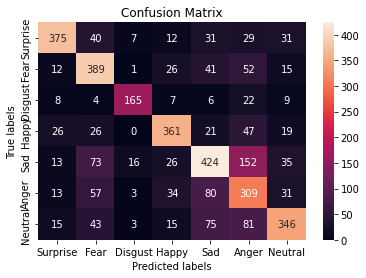

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

#another solution with log plot  val and train graph

In [ ]:
# concatenate history from all the log files
hist_df = pd.DataFrame()
epoch = 20
for i in range(4):
  df = pd.read_csv('/content/drive/MyDrive/graduation3/runedit2/history' + str(epoch * (i + 1)) + '.log', delimiter = ',')
  hist_df = pd.concat([hist_df, df], ignore_index = True)

hist_df

,epoch,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0,0.549051,1.403479,0.241438,1.879438
1,1,0.620359,1.168001,0.306131,2.784294
2,2,0.649367,1.077953,0.348837,1.896810
3,3,0.675527,0.996412,0.411839,2.142398
4,4,0.706751,0.938251,0.381818,2.285537
...,...,...,...,...,...
75,15,0.980591,0.106023,0.589429,2.277304
76,16,0.976582,0.128352,0.597463,2.237126
77,17,0.983544,0.099441,0.579281,2.592986
78,18,0.987025,0.089064,0.578858,2.414168


In [ ]:
epoch = 20
for i in range(4):
  log = pd.read_csv('/content/drive/MyDrive/graduation3/runedit2/history' + str(epoch * (i + 1)) + '.log')
  log = pd.DataFrame(log)
  print(log.shape)
  if(i == 0):
    logs = log.copy()
  else:
    pd.concat([logs,log])
    print(logs.shape)

(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)


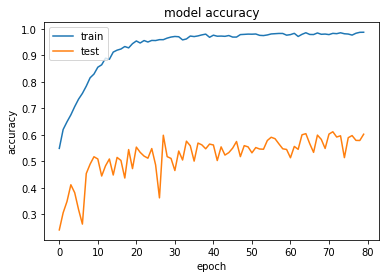

In [ ]:
# summarize history for accuracy
plt.plot(hist_df['categorical_accuracy'])
plt.plot(hist_df['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

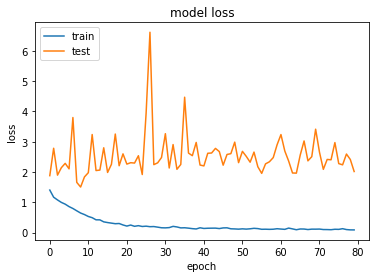

In [ ]:
# summarize history for loss
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()